<a href="https://colab.research.google.com/github/chandusayhi/Rossmann_Sales_Prediction_Capstone/blob/main/Chandrakant_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

<h1>Table of Contents</h1>
<div class=\"toc\"><ul class=\"toc-item\">
<li>1&nbsp;&nbsp;Introduction</li>
<li>2&nbsp;&nbsp;Importing Libraries &amp; Data</li>
<li>3&nbsp;&nbsp;Data Cleaning</li>
<li>4&nbsp;&nbsp;Adding missing value</li>
<li>5&nbsp;&nbsp;Exploratory Data Analyses &amp; Visualization</li>
<li>6&nbsp;&nbsp;Feature Engineering</li>
<li>7&nbsp;&nbsp;Model Development</li>
<li>8&nbsp;&nbsp;Prediction &amp; Validation</li>
<li>9&nbsp;&nbsp;Conclusion</li></ul></div>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

<h4>Rossman is Germany’s second largest drug store chain with more than
1115 stores across the country. Every month, the store manager needs to set targets for the sales team and design incentives for them. Currently, the managers set the targets based on their intuition of how much the sales are going to be in next month- which often leads to wrong target settings. Setting targets that are too high or unrealistic can lead to failure of the sales teams to meet the targets and therefore, loss of morale. On the other hand, setting targets that are very low will have costs in terms of lost opportunities/revenues.<h4>


####To forecast the daily sale of individual 1115 Rossmann stores located across Germany, 6 weeks in advance.
####Historical data upto 2 year 7 month is provided(Jan 2013 to July 2015)

###Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importing Libraries

In [3]:
pip install inflection

In [4]:
# Importing the libraries
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

<h4><b>Roseman Sales Dataset</b></h4>

This is a dataset of Roseman Stores. On analsysing this problem we observe that Roseman problem is a regression problem and our primarily goal is to predict the sales figures of Roseman problem. In this Notebook we work on following topics

* Analysing the Dataset by using Exploratory Data Analysis.
* Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset.
* Analyse Regression analysis using following prediction analysis, 
  <ul>
  <li>Linear Regression Analysis 
  <li>Elastic Regression ( Lasso and Ridge Regression). 
  <li>Random Forest Regression. 
  <li>Extreme Gradiant Boosting Algorithm.

###Loading Data

In [9]:
# Importing the store data as df_store_data and additional store dataset as df_ross_data
df_ross_data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Supervised_ML_Regression/Data _ Resources/Rossmann Stores Data.csv", low_memory = False)
df_store_data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Supervised_ML_Regression/Data _ Resources/store.csv", low_memory = False)
#merge two dataframe
df_raw = pd.merge(df_ross_data, df_store_data, how = 'left', on = 'Store')

Data Cleansing in Roseman Dataset - We observe that Rosemann Data consists of two dataset details are 
* Store Dataset - This consists of all the information about various stores types. We observe that there are four categories of stores in Roseman Dataset, we will analyse store wise performance of dataset in detail.

* Rosemann Dataset (train.csv) - This is a complete dataset of all the detailed information about sales in various stores.

We observe that Rosemann store dataset has around 10 Lakhs records means it is a huge dataset. We have to join both the datasets i.e. Rosemann and Store and clean them. One important thing is that we reduce the datatype to int32 instead of int64 in order to improve performance of our dataset.

Since we are using sklearn and numeric values are prereuqisite and mandatory requirement for different models, so we ensure that all the columns have int32 values.

Here we have two data frame first one is df_store_data which has the sales values and second one is the df_ross_data which has all the additional information about stores.

If we observe we find that both column has "Store" column which contains a unique store id, so to get all data in a single dataframe we have to merge these two tables on that key "Store".

In [10]:
# Let's see if the right table has imported or not.
df_store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
# Let's see if the right table has imported or not.
df_ross_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [12]:
#Getting the details about columns 
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [13]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

In [14]:
#Renaming the columns names
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))
df_raw.columns = cols_new
df_raw.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

In data frame "df_raw" we have our final data to be processed further. Before doing all modifications let's make a copy of data so that or original data would be preserved.

In [15]:
#Creading the copy of the dataframe in order to maintain the original data
df = df_raw.copy()

In [16]:
#Finding the sales count
df[df.open == 0].sales.value_counts()

0    172817
Name: sales, dtype: int64

In [17]:
#Printing the details of rows and columns 
print( 'Number of Rows {}'.format(df.shape[0]))
print( 'Number of Columns {}'.format(df.shape[1]))

Number of Rows 1017209
Number of Columns 18


In [18]:
#Function to split the date into year, month, day and week of year
def split_date(df):
  df['date'] = pd.to_datetime(df['date'])
  df['Year'] = df.date.dt.year
  df['Month'] = df.date.dt.month
  df['Day'] = df.date.dt.day
  df['WeekOfYear'] = df.date.dt.isocalendar().week

In [19]:
#Calling the Split functions
split_date(df)

In [20]:
#Printing the dataframe
df

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [21]:
#Retrieving the information about the dataframe
print("#################################################### DATA INFROMATION ##############################################################################")
print()
print(df.info())
df['date'] = pd.to_datetime(df['date'])

#################################################### DATA INFROMATION ##############################################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int64         
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  int64         
 6   promo                         1017209 non-null  int64         
 7   state_holiday                 1017209 non-null  object        
 8   school_holiday                1017209 non-null  int6

###Filling Missing Values and Removing Outliers
Few columns have high number of missing values, so we need to fill them with appropriate method for better result.

Approach

1: Promo tells us wheather store is in pomotion or not and here the 0 count is 58031 which is same as the null values in PromoInterval , Promo2SinceYear and Promo2SinceWeek columns and that is obvious. The null values in Column promo2_since_week, promo2_since_year, promo_interval is due to promo is 0 for those stores. So we would fill all the null values in these columns with 0.

2: Since Competition Distance for 3 stores isn't given so we could fill it with mean of the distance given for all other stores

3: CompetitionOpenSinceMonth, CompetitionOpenSinceYear can be filled using the most occuring month and year respectively.

In [22]:
#Displaying missing values and percentage of missing values
perc_missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T.sort_values(1,ascending=False)
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
promo_interval,508031.0,49.943620
promo2_since_year,508031.0,49.943620
promo2_since_week,508031.0,49.943620
competition_open_since_year,323348.0,31.787764
competition_open_since_month,323348.0,31.787764
competition_distance,2642.0,0.259730
day_of_week,0.0,0.000000
Day,0.0,0.000000
Month,0.0,0.000000
Year,0.0,0.000000


In [23]:
#competition_distance
df['competition_distance'] = df['competition_distance'].apply( lambda x: 200000.0 if math.isnan(x) else x) 
#competition_open_since_month
df['competition_open_since_month'] = df.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)
#competition_open_since_year
df['competition_open_since_year'] = df.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)
#promo2_since_week
df['promo2_since_week'] = df.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis = 1)
#promo2_since_year
df['promo2_since_year'] = df.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis = 1)
#promo_interval
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['promo_interval'].fillna(0, inplace = True)
df['month_map'] = df['date'].dt.month.map(month_map)
df['is_promo'] = df[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1)

In [24]:
#Displaying missing values and percentage of missing values
perc_missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T.sort_values(1,ascending=False)
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
store,0.0,0.0
day_of_week,0.0,0.0
month_map,0.0,0.0
WeekOfYear,0.0,0.0
Day,0.0,0.0
Month,0.0,0.0
Year,0.0,0.0
promo_interval,0.0,0.0
promo2_since_year,0.0,0.0
promo2_since_week,0.0,0.0


###Finding Outliers

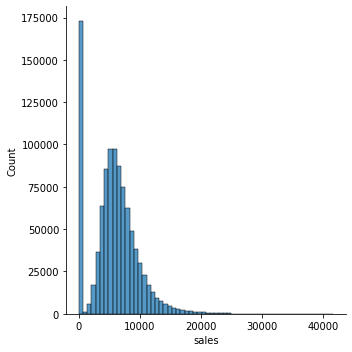

In [25]:
sns.displot(df,x='sales',bins=60)

##Observation:
As we can see in the distribution plot Sales greater than 25k are very less,therefore they might be the outliers.

Z-Score: If the Z-Score of any datapoint is greater than 3(threshold) then that can be considered as an Outlier

Total No.of outliers in dataset:  9731


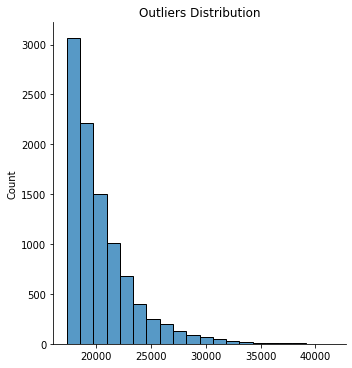

In [26]:
mean_sales = np.mean(df['sales'])
std_sales = np.std(df['sales'])

threshold = 3

outliers = []
for i in df['sales']:
    z_score = (i-mean_sales)/std_sales
    if z_score > threshold:
        outliers.append(i)
        
print('Total No.of outliers in dataset: ', len(outliers))

sns.displot(x=outliers,bins=20).set(title='Outliers Distribution')

In [27]:
# Percentage of Outliers 
zero_sales = df.loc[df['sales']==0]

sales_greater_than_25k = df.loc[df['sales'] > 25000]

print('Length of the dataset:', len(df))
print('Percentage of Zeros in dataset: %.3f%%' %((len(zero_sales)/len(df))*100))
print('Percentage of sales greater than 25k in dataset: %.3f%% ' %((len(sales_greater_than_25k)/len(df))*100))

Length of the dataset: 1017209
Percentage of Zeros in dataset: 16.995%
Percentage of sales greater than 25k in dataset: 0.075% 


##Obervation:
We can drop the sales datapoints which are greater than 25k as they are very less percentage of the dataset and are probably outliers

In [28]:
#Dropping the outliers
df.drop(df.loc[df['sales'] > 25000].index,inplace=True)

In [29]:
#After Dropping the outliers
df.shape

(1016451, 24)

In [30]:
#Converting the Datatypes
df.competition_open_since_month = df.competition_open_since_month.astype(int)
df.competition_open_since_year = df.competition_open_since_year.astype(int)
df.promo2_since_week = df.promo2_since_week.astype(int)
df.promo2_since_year = df.promo2_since_year.astype(int)

In [31]:
num_attributes = df.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

In [32]:
#Central Tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ["Attribute", "Min", "Max", "Range", "Mean", "Median", "Std", "Skew", "Kurtosis"]
m


,Attribute,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,store,1.0,1115.0,1114.0,558.393098,558.0,321.918982,-0.000972,-1.200543
1,day_of_week,1.0,7.0,6.0,3.998933,4.0,1.997063,0.001302,-1.246585
2,sales,0.0,25000.0,25000.0,5757.209551,5741.0,3802.304066,0.522852,1.073123
3,customers,0.0,4645.0,4645.0,631.032490,609.0,457.368650,1.455955,5.974273
4,open,0.0,1.0,1.0,0.829980,1.0,0.375650,-1.756849,1.086521
5,promo,0.0,1.0,1.0,0.381296,0.0,0.485705,0.488790,-1.761088
6,school_holiday,0.0,1.0,1.0,0.178637,0.0,0.383048,1.677926,0.815436
7,competition_distance,20.0,200000.0,199980.0,5938.716456,2330.0,12551.218294,10.240414,147.719564
8,competition_open_since_month,1.0,12.0,11.0,6.787266,7.0,3.311029,-0.042626,-1.232445
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324485,2012.0,5.516690,-7.236457,124.062576


In [33]:
df.describe()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,Year,Month,Day,WeekOfYear,is_promo
count,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06,1.016451e+06
mean,5.583931e+02,3.998933e+00,5.757210e+03,6.310325e+02,8.299800e-01,3.812963e-01,1.786372e-01,5.938716e+03,6.787266e+00,2.010324e+03,5.008358e-01,2.361426e+01,2.012793e+03,2.013832e+03,5.845542e+00,1.570249e+01,2.361017e+01,1.660818e-01
std,3.219191e+02,1.997064e+00,3.802306e+03,4.573689e+02,3.756506e-01,4.857053e-01,3.830485e-01,1.255122e+04,3.311031e+00,5.516693e+00,4.999995e-01,1.430782e+01,1.662858e+00,7.774047e-01,3.325477e+00,8.787017e+00,1.443052e+01,3.721542e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.725000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000e+00,2.008000e+03,0.000000e+00,1.200000e+01,2.012000e+03,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.741000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,7.000000e+00,2.012000e+03,1.000000e+00,2.200000e+01,2.013000e+03,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.849000e+03,8.360000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.910000e+03,1.000000e+01,2.014000e+03,1.000000e+00,3.700000e+01,2.014000e+03,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,0.000000e+00
max,1.115000e+03,7.000000e+00,2.500000e+04,4.645000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+05,1.200000e+01,2.015000e+03,1.000000e+00,5.200000e+01,2.015000e+03,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,1.000000e+00


In [34]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
WeekOfYear        52
month_map         12
dtype: int64

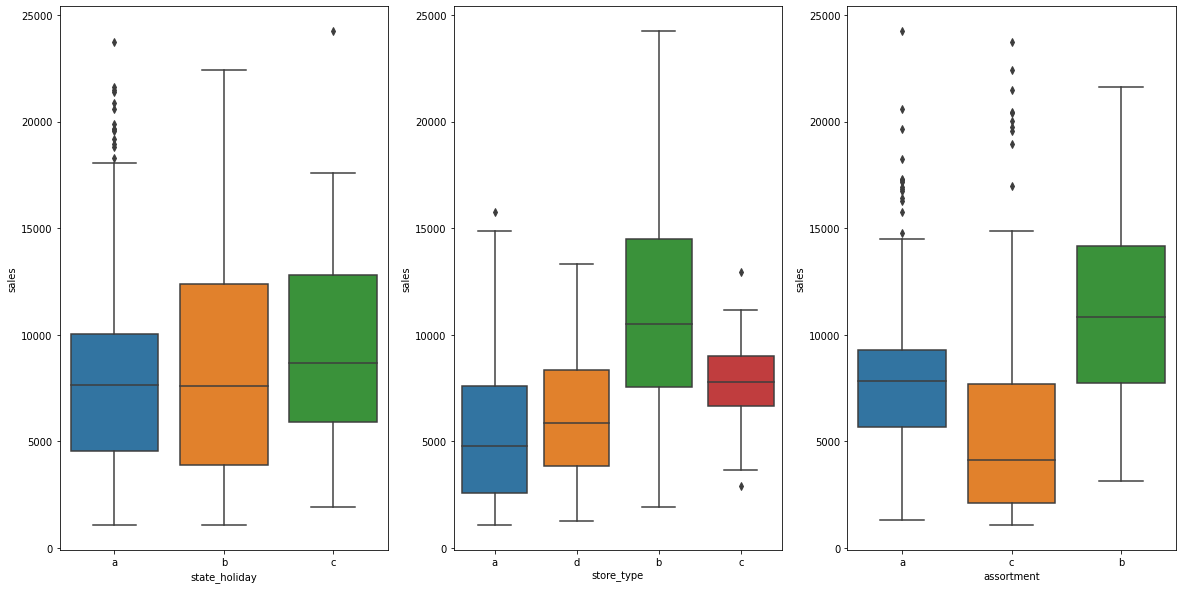

In [35]:
plt.rcParams['figure.figsize'] = (20, 10)
aux1 = df[(df['state_holiday'] != '0') & df['sales'] > 0]
plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)
plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)
plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)

##Yearly Sales Analysis

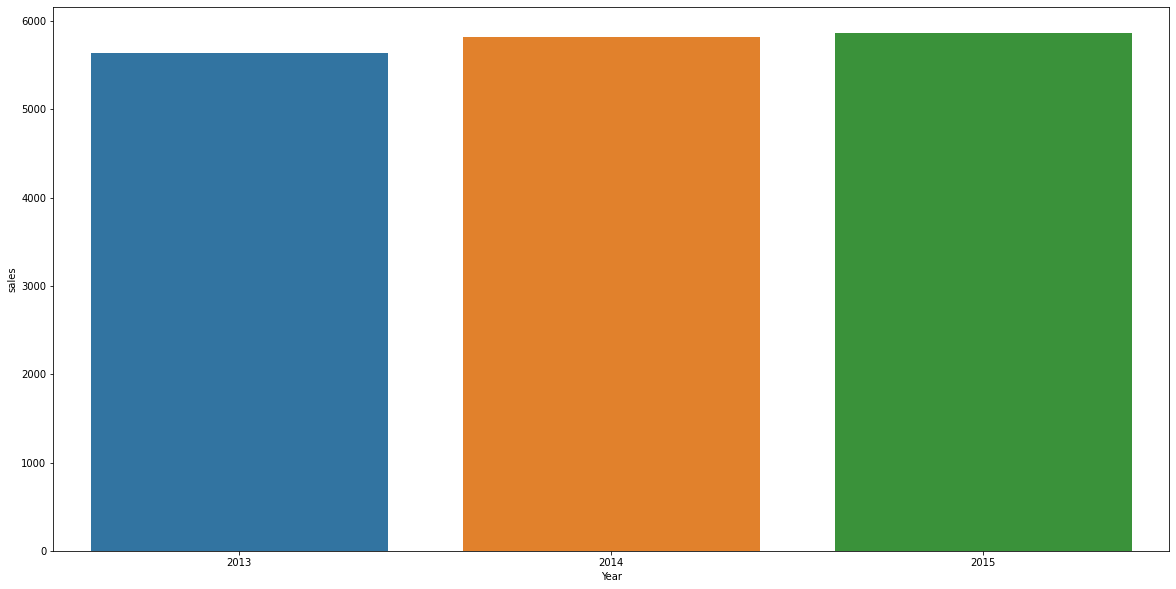

In [37]:
#Observing Yearly Sales of Roseman Stores
rosemangrpys = df.groupby(['Year'],as_index = False)
rosemangrpys.groups
rosemangpys = rosemangrpys.agg({'sales':np.mean})
rosemangpys
sns.barplot(x='Year',y='sales',data = rosemangpys)

##Observation:
####Our Observations on Rosemann Store Yearly Sales Analysis - 
While Observing yearly sales of Rosemann Stores we observe that sales of Rosemann store stagnates on year on year basis. Rosemann team have to work vey hard to increase the yearly sales.

##Weekly sales Analysis

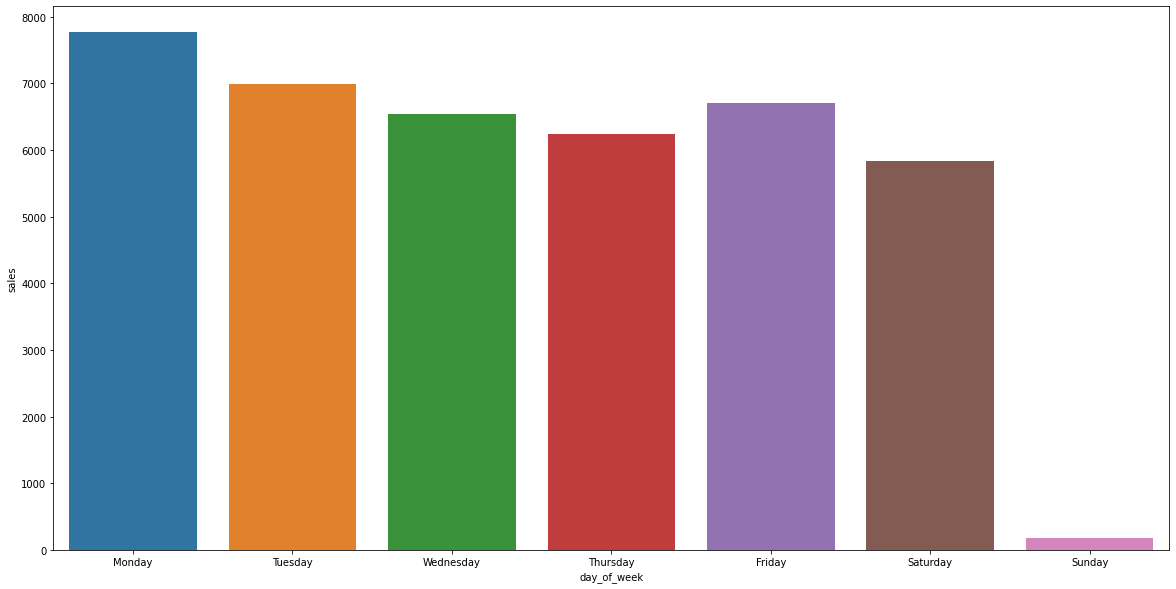

In [38]:
#sns.barplot(x='day_of_week',y='sales',data=df).set(title='Sales vs Day of Week')
rosemangrp = df.groupby(['day_of_week'],as_index = False)
rosemangrp.groups
rosemangp = rosemangrp.agg({'sales':np.mean})
rosemangp
rosemangp['day_of_week'] =rosemangp['day_of_week'].map({7:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}).astype(str)
rosemangp
sns.barplot(x='day_of_week',y='sales',data = rosemangp)

###Observation
####Our Observations after anlysing weekdays sales- 
On analysing we observe that Rosemann store sales drops drastically on weekends especially on sundays mean people not prefer to go to stores on sundays and sales improve drastically on Monday and Tuesday, it indicates that people prefer shopping on roseman stores on weekday and not on weekends.

##Monthly Sales Analysis

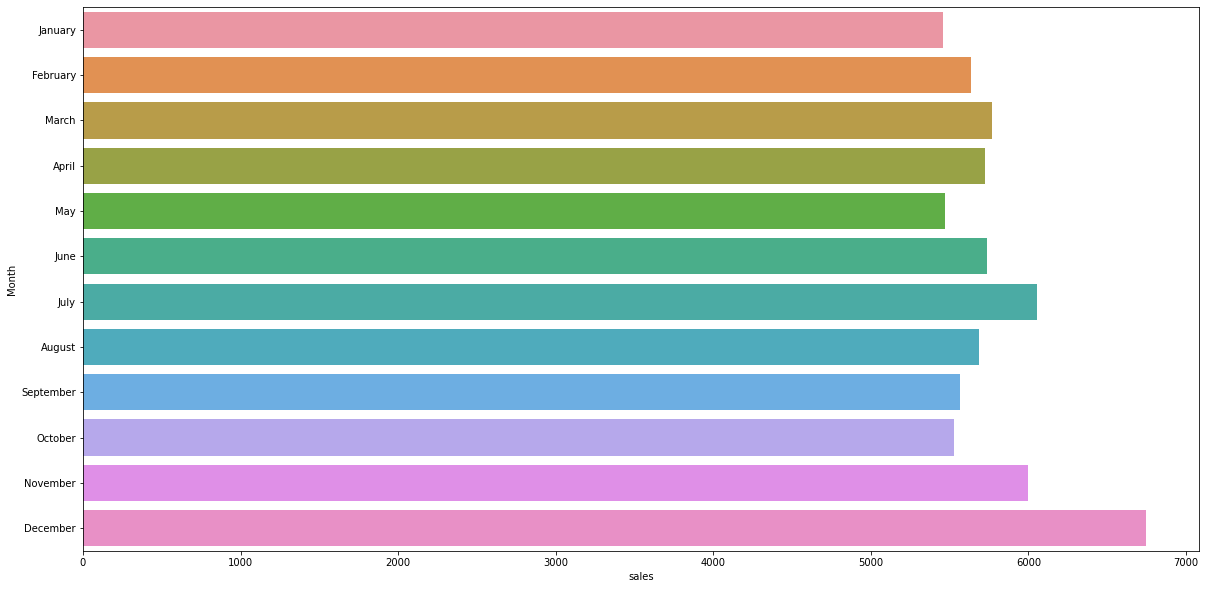

In [39]:
#Observing Monthly Sales of Roseman Stores
rosemangrpms = df.groupby(['Month'],as_index = False)
rosemangrpms.groups
rosemangpms = rosemangrpms.agg({'sales':np.mean})
rosemangpms
rosemangpms['Month'] =rosemangpms['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}).astype(str)
rosemangpms
sns.barplot(x='sales',y='Month',data = rosemangpms)

##Observations
Our Observations on Rosemann Monthly Sales- We observe that Santa Clause have special blessing on Roseman Stores means in month of December sales increases.

###Promo Impact

[Text(0.5, 1.0, 'Sales on Promo')]

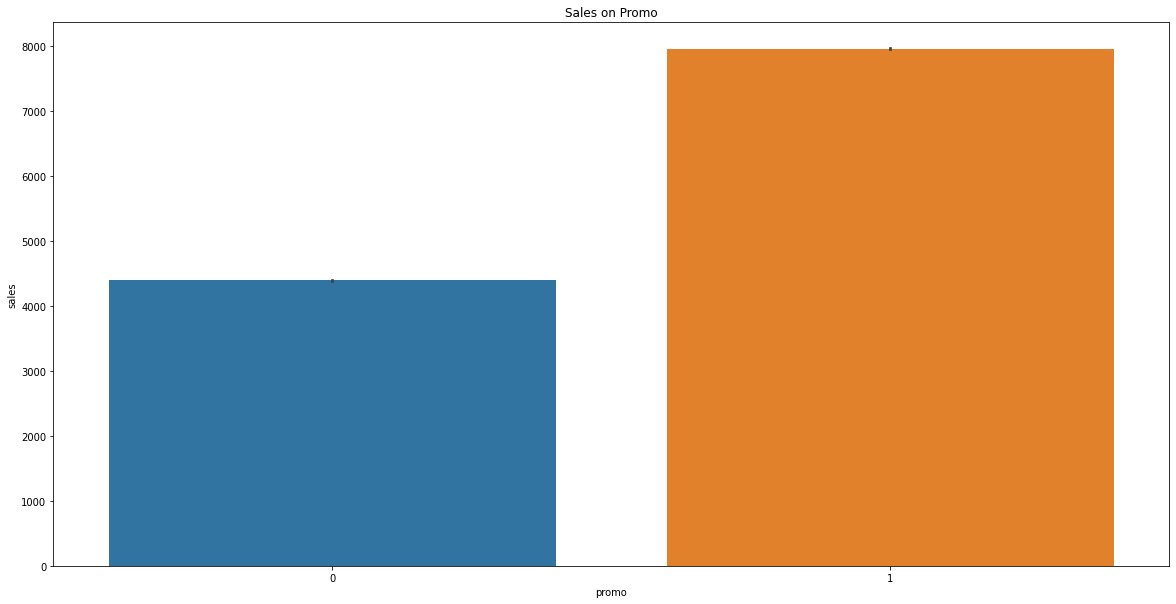

In [40]:
# Lets see how promo is impacting sales
sns.barplot(x='promo',y='sales',data=df).set(title='Sales on Promo')

##Observation
Customers are definitely attracted by Promo codes, thus sales are higher when there is a Promo code in a Store

###State Holiday Impact

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



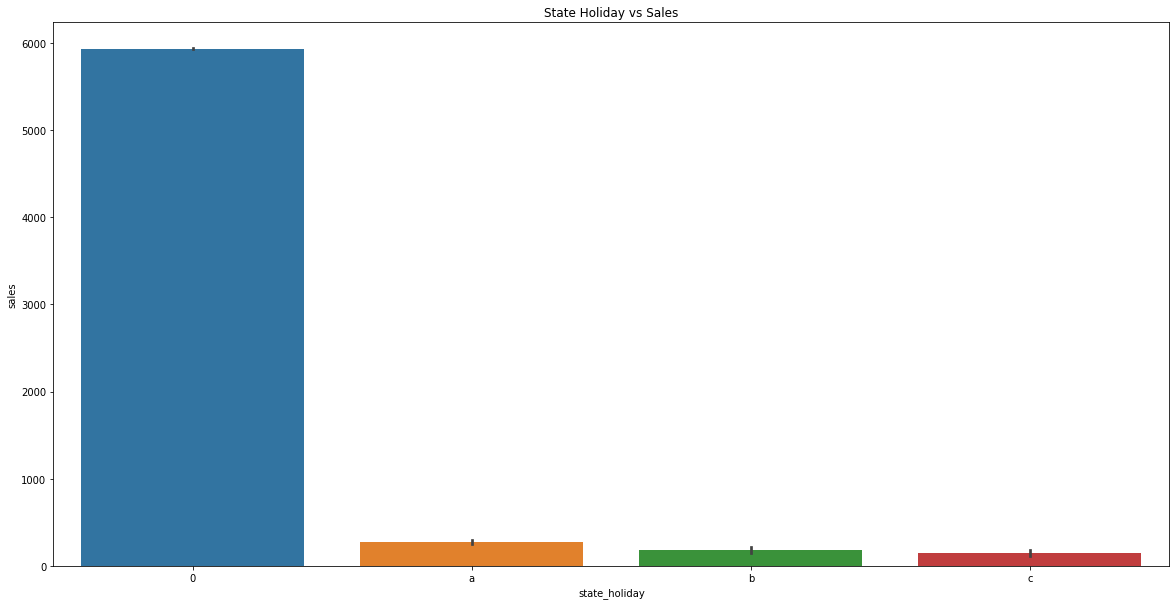

In [41]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"

df['state_holiday'].loc[df['state_holiday'] == 0] = '0'

# Sales with respect to State Holiday
sns.barplot(x='state_holiday', y='sales', data=df).set(title='State Holiday vs Sales')
plt.show()

##Observation
Most stores are closed on State Holidays that's why we can see that there are very less sales in a,b,c
where

a = Public Holiday, b = Easter Holiday, c = Chirstmas, 0 = No Holiday, Working day

###School Holiday Imapct

[Text(0.5, 1.0, 'School Holiday vs Sales')]

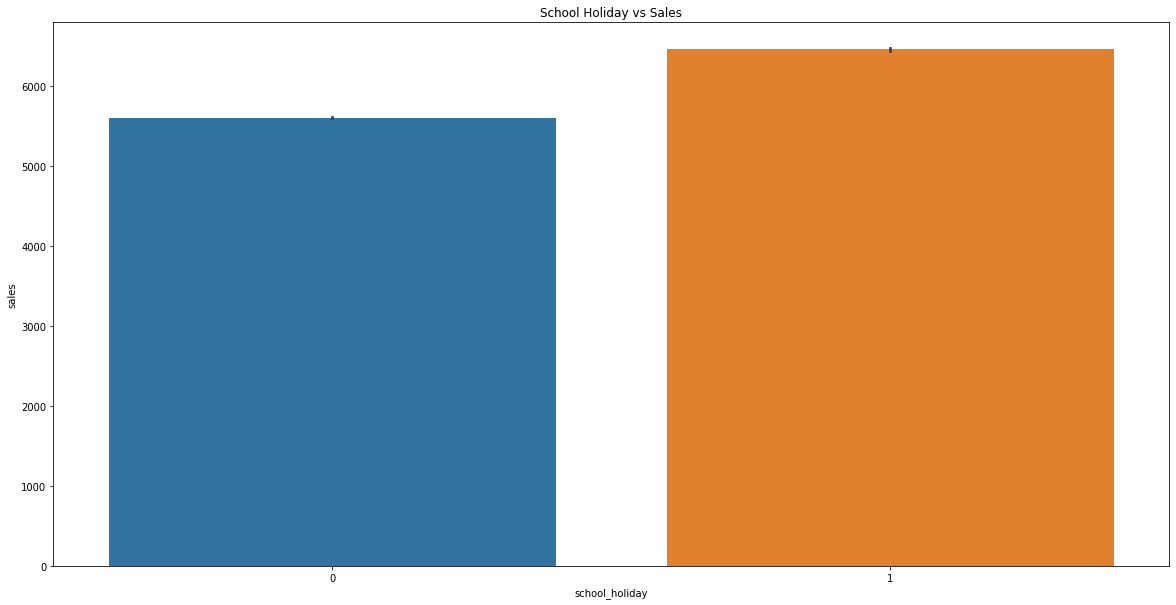

In [42]:
# Sales with respect to School Holiday
sns.barplot(x='school_holiday', y='sales', data=df).set(title='School Holiday vs Sales')

##Observation
On School Holidays there are more sales.

###Store Type Impact

[Text(0.5, 1.0, 'StoreType vs Sales')]

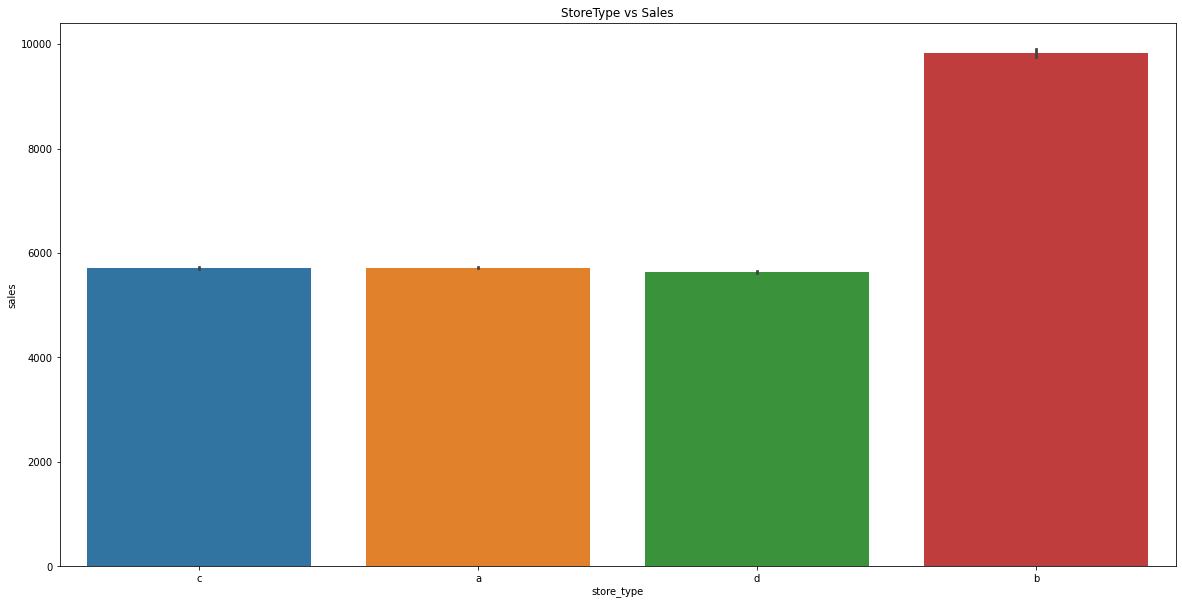

In [43]:
# Sales with respect to Storetype
sns.barplot(x='store_type', y='sales', data=df).set(title='StoreType vs Sales')

##Observation
Of all a,b,c,d are store models b type stores have the highest sales

###Assortment Impact

[Text(0.5, 1.0, 'Assortment vs Sales')]

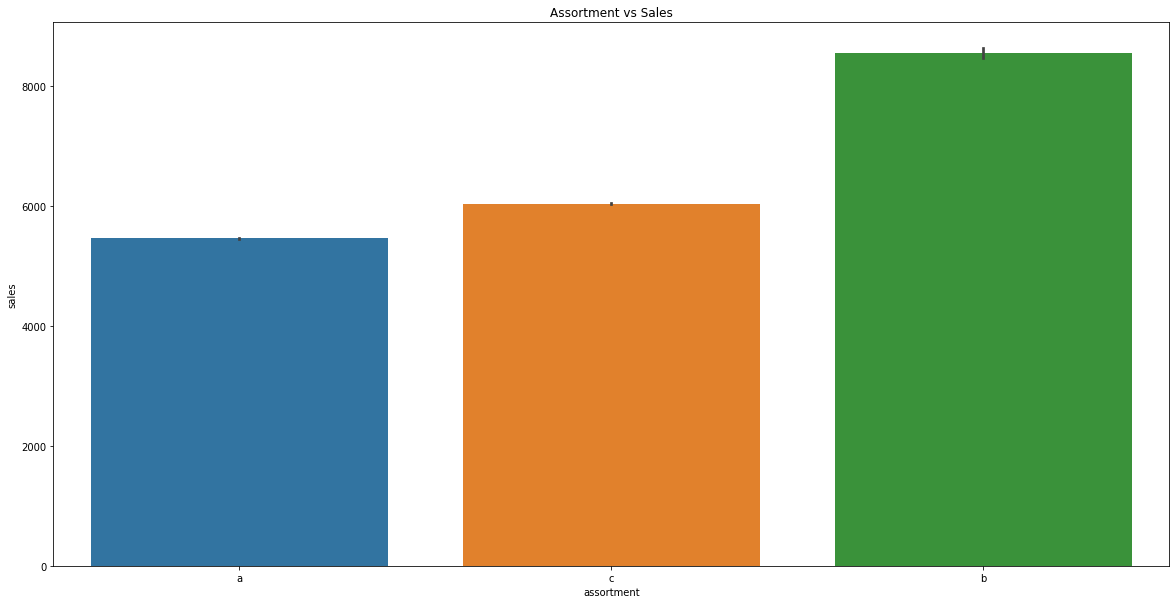

In [44]:
# Sales with respect to Assortment
sns.barplot(x='assortment', y='sales', data=df).set(title='Assortment vs Sales')

##Observation
Assortment level 'b' have the highest sales

In [45]:
# Correlation
correlation = df.corr()
correlation

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,Year,Month,Day,WeekOfYear,is_promo
store,1.000000,0.000283,0.004597,0.024113,-0.000098,-0.000206,0.000554,-0.013731,-0.033158,0.000606,0.008597,0.004960,0.014427,0.000302,0.001445,0.000020,0.001414,0.004958
day_of_week,0.000283,1.000000,-0.466665,-0.391685,-0.529153,-0.392644,-0.205405,-0.000079,-0.001722,-0.000039,0.000075,-0.001747,0.000330,0.001838,-0.005083,0.005141,-0.004600,-0.004572
sales,0.004597,-0.466665,1.000000,0.893091,0.685301,0.455856,0.086124,-0.023536,-0.001496,0.009747,-0.089049,0.054629,0.051356,0.024545,0.047228,-0.011945,0.051441,-0.040797
customers,0.024113,-0.391685,0.893091,1.000000,0.624456,0.319065,0.072639,-0.077799,-0.006388,0.006445,-0.148849,0.039133,0.105669,-0.000426,0.036660,-0.004698,0.039945,-0.066459
open,-0.000098,-0.529153,0.685301,0.624456,1.000000,0.295004,0.086200,0.004730,0.000389,0.002480,-0.008067,0.001340,0.006047,-0.000956,-0.000847,0.033430,0.004627,0.000273
promo,-0.000206,-0.392644,0.455856,0.319065,0.295004,1.000000,0.067568,0.000177,-0.003636,0.001303,-0.000711,0.000481,0.005983,0.024431,-0.011991,-0.108372,0.000311,0.004342
school_holiday,0.000554,-0.205405,0.086124,0.072639,0.086200,0.067568,1.000000,-0.002924,0.035037,0.000270,-0.006892,0.033097,-0.005158,-0.036570,0.103360,0.030452,0.071125,0.020832
competition_distance,-0.013731,-0.000079,-0.023536,-0.077799,0.004730,0.000177,-0.002924,1.000000,-0.037965,0.038173,-0.103269,-0.025033,0.049747,0.000090,0.000695,0.000016,0.000675,-0.046176
competition_open_since_month,-0.033158,-0.001722,-0.001496,-0.006388,0.000389,-0.003636,0.035037,-0.037965,1.000000,-0.139582,-0.032323,0.109475,0.028510,-0.085955,0.318870,0.003980,0.308357,-0.037483
competition_open_since_year,0.000606,-0.000039,0.009747,0.006445,0.002480,0.001303,0.000270,0.038173,-0.139582,1.000000,-0.015217,-0.011121,0.003409,0.045358,-0.008849,-0.000096,-0.008376,-0.009405


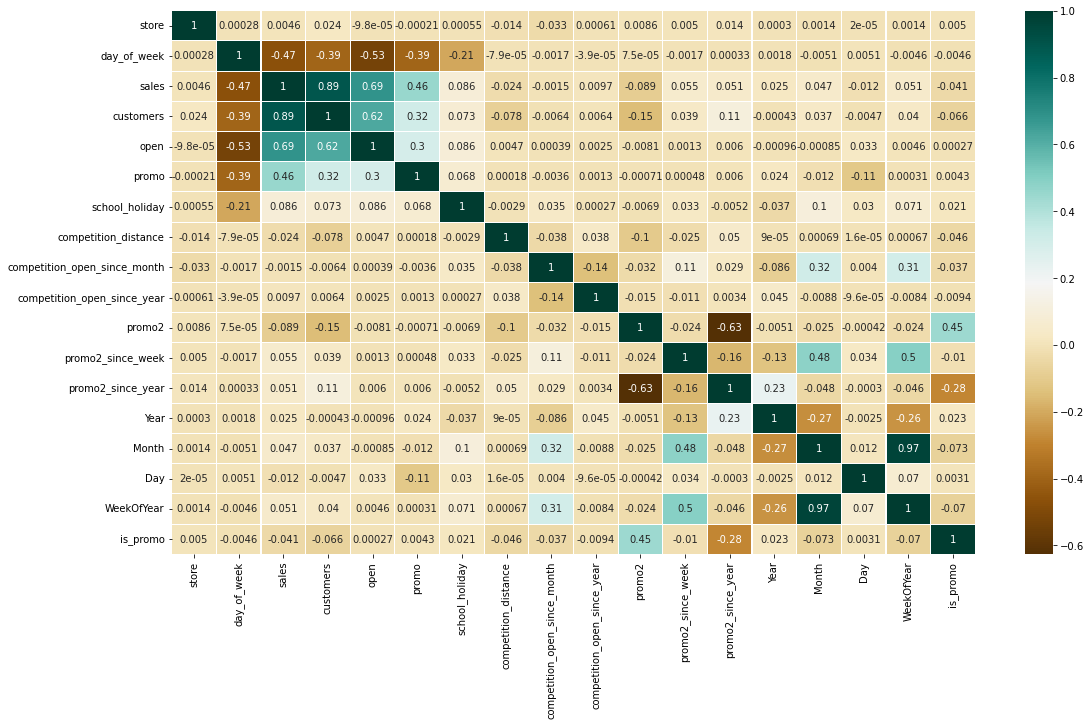

In [46]:
# Heat Map
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='BrBG')

##Observation
Correlation map shows

Sales is highly correlated with Customers, Open and Promo code and minorly correlated to school holidays

Since Rosemann problem is a problem of continous sales data. Exponential Moving Averages are (EMA) best indicator to analyse 
* A. Trend in a Data - This means that sales data is in a uptrend or downtrend. 
* B. Seasonality in a data- This means where sales figure increases in some speciific timeframes.

For ananlysing regression problems Exponential Moving Average (EMA) figures gives complete picure of data. By analysing this data we are able to understand whether doing business is feasible what are the important opportunities when we are able to get optimum benifits.

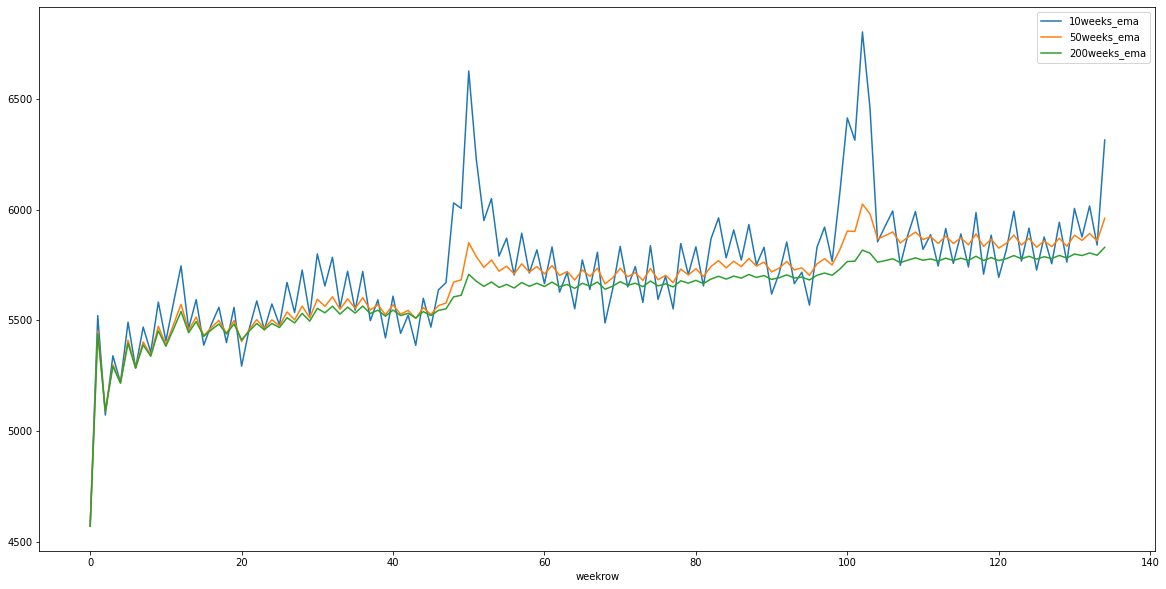

In [47]:
#Exponential Moving Average chart of Sales figure
rosemanall_weekly = df.groupby(['Year','WeekOfYear'],as_index = False)
rosemanall_weekly.groups
rosemanall_weekly = rosemanall_weekly.agg({'sales':np.mean})
rosemanll_weekly = rosemanall_weekly.sort_values(by = ['Year','WeekOfYear'])
rosemanall_weekly['weekrow']= rosemanall_weekly.reset_index().index

rosemanall_weekly['10weeks_ema'] = rosemanall_weekly.sales.ewm(span=10).mean()
rosemanall_weekly['50weeks_ema'] = rosemanall_weekly.sales.ewm(span=50).mean()
rosemanall_weekly['200weeks_ema'] = rosemanall_weekly.sales.ewm(span=200).mean()
rosemanall_weekly.plot('weekrow', ['10weeks_ema','50weeks_ema','200weeks_ema'])
plt.show()

##Observations 
While Analysing Exponential Moving Average chart Rosemann sales we analyse following observations:

Trend - EMA chart analyse that Rosemann data is in uptrend and it always above the 200 Exponential Moving Average figures but 200 EMA line is not a steep slope informs that Rosemann sales figure is in slow uptrend.

Seasonlity - 10 weeks EMA chart figures shows that sales has upward seasonality and for some weeks sales figures improves drastically.

###Store Type Wise Exponential Moving Average Analysis
While analysing database we observe that Rosemann have four different types of stores. After analysing complete dataset, We now analyse Exponential Moving Average Analysis of Sales figures Storetype wise means how the behaviour of different store types in order to going deeper and understand how to improve sales.

In [48]:
#Moving Average Chart of Store Wise Sales Figure
rosemanall_a = df.loc[df['store_type'] == 'a']
rosemanall_b = df.loc[df['store_type'] == 'b']
rosemanall_c = df.loc[df['store_type'] == 'c']
rosemanall_d = df.loc[df['store_type'] == 'd']

###STORETYPE A WEEKLY EMA CHART

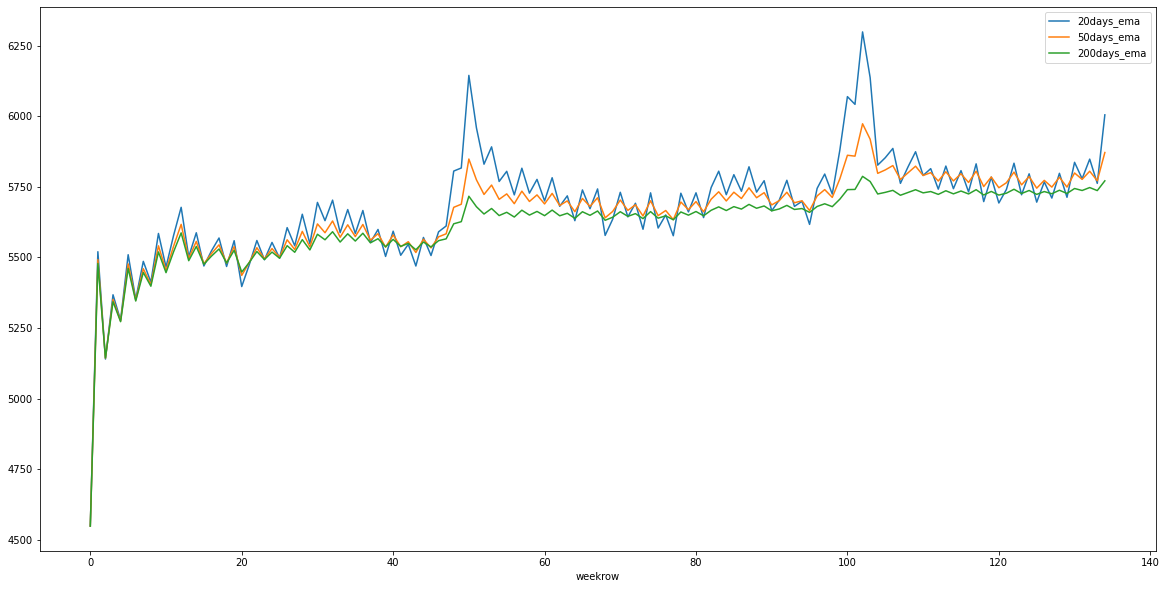

In [49]:
#EMA Analysis Storewise
rosemanall_a_weekly = rosemanall_a.groupby(['Year','WeekOfYear'],as_index = False)
rosemanall_a_weekly.groups
rosemanall_a_weekly = rosemanall_a_weekly.agg({'sales':np.mean})
rosemanll_weekly = rosemanall_a_weekly.sort_values(by = ['Year','WeekOfYear'])
rosemanall_a_weekly['weekrow']= rosemanall_a_weekly.reset_index().index

rosemanall_a_weekly['20days_ema'] = rosemanall_a_weekly.sales.ewm(span=20).mean()
rosemanall_a_weekly['50days_ema'] = rosemanall_a_weekly.sales.ewm(span=50).mean()
rosemanall_a_weekly['200days_ema'] = rosemanall_a_weekly.sales.ewm(span=200).mean()

rosemanall_a_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

###STORETYPE B WEEKLY CHART

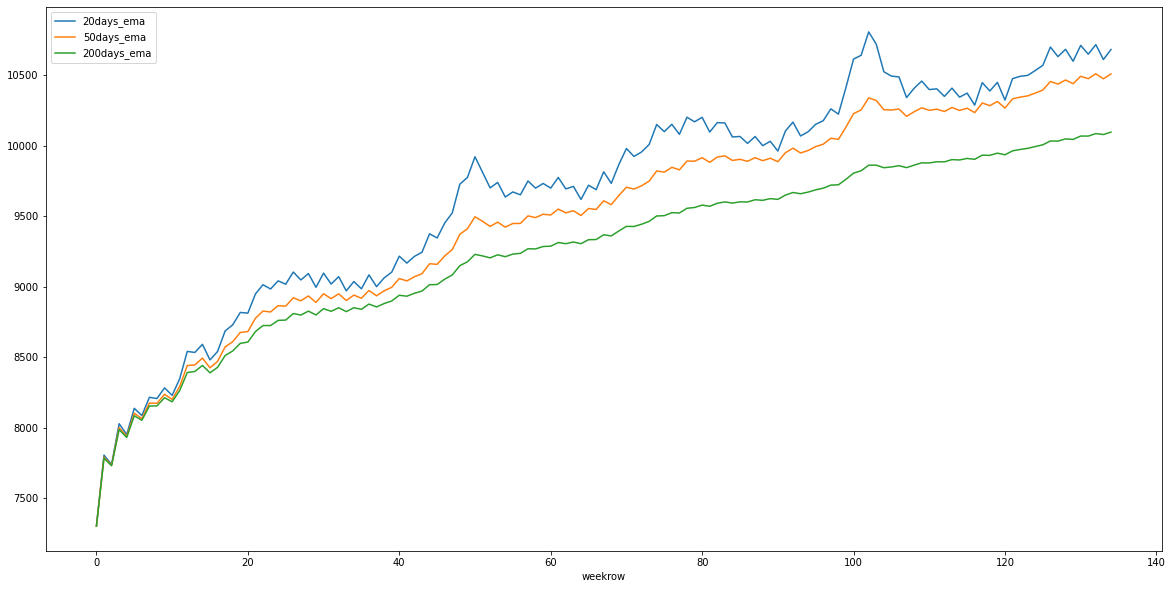

In [50]:
#EMA Analysis Storewise
rosemanall_b_weekly = rosemanall_b.groupby(['Year','WeekOfYear'],as_index = False)
rosemanall_b_weekly.groups
rosemanall_b_weekly = rosemanall_b_weekly.agg({'sales':np.mean})
rosemanll_weekly = rosemanall_b_weekly.sort_values(by = ['Year','WeekOfYear'])
rosemanall_b_weekly['weekrow']= rosemanall_b_weekly.reset_index().index

rosemanall_b_weekly['20days_ema'] = rosemanall_b_weekly.sales.ewm(span=20).mean()
rosemanall_b_weekly['50days_ema'] = rosemanall_b_weekly.sales.ewm(span=50).mean()
rosemanall_b_weekly['200days_ema'] = rosemanall_b_weekly.sales.ewm(span=200).mean()

rosemanall_b_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

###STORETYPE C WEEKLY CHART

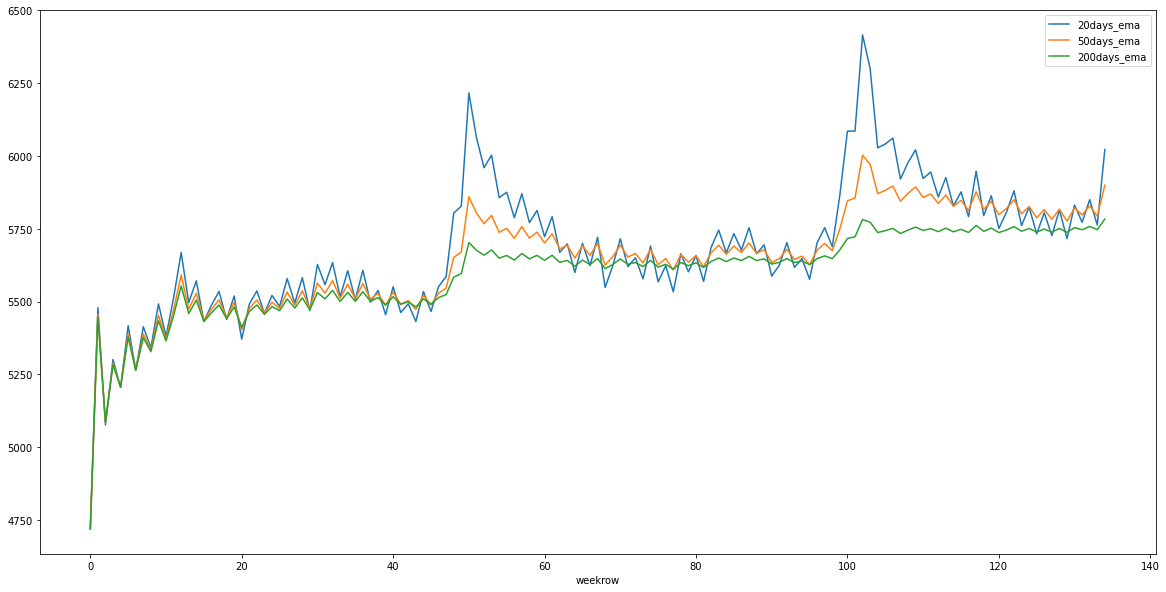

In [51]:
#EMA Analysis Storewise
rosemanall_c_weekly = rosemanall_c.groupby(['Year','WeekOfYear'],as_index = False)
rosemanall_c_weekly.groups
rosemanall_c_weekly = rosemanall_c_weekly.agg({'sales':np.mean})
rosemanll_weekly = rosemanall_c_weekly.sort_values(by = ['Year','WeekOfYear'])
rosemanall_c_weekly['weekrow']= rosemanall_c_weekly.reset_index().index

rosemanall_c_weekly['20days_ema'] = rosemanall_c_weekly.sales.ewm(span=20).mean()
rosemanall_c_weekly['50days_ema'] = rosemanall_c_weekly.sales.ewm(span=50).mean()
rosemanall_c_weekly['200days_ema'] = rosemanall_c_weekly.sales.ewm(span=200).mean()

rosemanall_c_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

###STORETYPE D WEEKLY EMA CHART

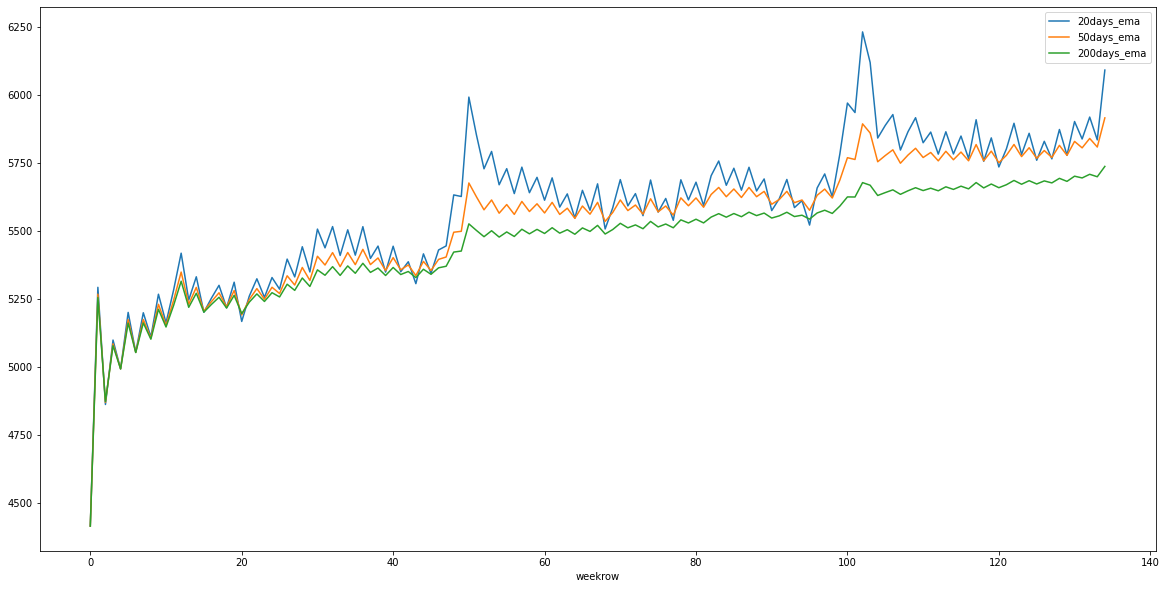

In [52]:
#EMA Analysis Storewise
rosemanall_d_weekly = rosemanall_d.groupby(['Year','WeekOfYear'],as_index = False)
rosemanall_d_weekly.groups
rosemanall_d_weekly = rosemanall_d_weekly.agg({'sales':np.mean})
rosemanll_weekly = rosemanall_d_weekly.sort_values(by = ['Year','WeekOfYear'])
rosemanall_d_weekly['weekrow']= rosemanall_d_weekly.reset_index().index

rosemanall_d_weekly['20days_ema'] = rosemanall_d_weekly.sales.ewm(span=20).mean()
rosemanall_d_weekly['50days_ema'] = rosemanall_d_weekly.sales.ewm(span=50).mean()
rosemanall_d_weekly['200days_ema'] = rosemanall_d_weekly.sales.ewm(span=200).mean()

rosemanall_d_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

##Observations
Our Observations after analysis of Rosemann Storetype wise Exponential Moving Average Charts are:

After analysing consolidated data we now analyse Rosemann Data Storewise. Following observations found

<b>STORETYPE A</b> - While analysing Exponential Moving Average Chart of Store Type A we observe that -Store type A sales figure in slight uptrend 20 days EMA never crosses 200 days EMA. -We observe seasonality in EMA chart and found sales of Storetype A sharply increase at Week 50 and week 105.

<b>STORETYPE B</b> - While analysing Exponential Moving Average Chart of Store Type B we observe that
* Storetype B Sales figures are in strong uptrend and 20 days EMA never crosses 50 days EMA sales chart of Storetype B is very strong.
* Although this chart is very strong we observe seasonality in upward seasonality at week 50 and week 105.


<b>STORETYPE C</b> - While analysing Exponential Moving Average Chart of Store Type C we observe that 
* Store type A sales figure in slight uptrend 20 days EMA never crosses 200 days EMA. 
* We observe seasonality in EMA chart and found sales of Storetype A sharply increase at Week 50 and week 105.

<b>STORETYPE D</b> - While analysing Exponential Moving Average Chart of Store Type D we observe that 
* Storetype D sales chart is in uptrend and better chart than Storetype A and C. 
* In this EMA chart we observe that support of 20 days EMA at 50 days EMA and most of time 20 days EMA line not cuts downward 20 days EMA line.


After analysing all the EMA charts store wise we observe following out of all the store type Rosemann has to focus aggresively on opening new Storetype B and D and focus on closure of Storetype A and C.Exponential Moving Average Analysis is a part of Time Series Analysis and Roseman problem is a time series analysis problem our conclusion is that EMA chart analysis gives us very indepth understanding of Roseman sales.